In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import random

In [4]:
# Observe data before beginning analysis
# Reference cleaned and merged crime-weather data file - data by hour
data_path = "output_data/crime_weather_merged.csv"
wdata_path = "output_data/dc_weather.csv"

# Read the data files 
data = pd.read_csv(data_path)
wdata = pd.read_csv(wdata_path)

#View merged data
data.head()

,ID,Year,Start Date,Start Time,Hour,Offense Group,Offense,Offense Text,Max Temp (f),Min Temp (f),Avg Temp (f),Total Precipitation (in),Avg Humidity (%),Day Condition,Hour Temp (f),Hour Condition,Hour Precipitation (in),Hour Humidity (%)
0,0,2022,2022-02-06,00:12:00,12:00AM,violent,robbery,robbery,40.5,24.1,32.8,0.0,52.0,Sunny,26.4,Clear,0.0,52.0
1,1,2022,2022-02-06,00:19:00,12:00AM,property,theft/other,theft/other,40.5,24.1,32.8,0.0,52.0,Sunny,26.4,Clear,0.0,52.0
2,2,2022,2022-02-06,01:00:00,1:00AM,property,motor vehicle theft,motor vehicle theft,40.5,24.1,32.8,0.0,52.0,Sunny,26.1,Clear,0.0,52.0
3,3,2022,2022-02-06,01:30:00,1:00AM,property,theft/other,theft/other,40.5,24.1,32.8,0.0,52.0,Sunny,26.1,Clear,0.0,52.0
4,4,2022,2022-02-06,02:45:00,2:00AM,violent,robbery,robbery,40.5,24.1,32.8,0.0,52.0,Sunny,25.8,Clear,0.0,53.0


In [5]:
#View weather data
wdata.head()

,Date_ID,date,maxtemp_f,mintemp_f,avgtemp_f,totalprecip_in,avghumidity,day_condition,0_temp_f,0_condition,...,21_precip_in,21_humidity,22_temp_f,22_condition,22_precip_in,22_humidity,23_temp_f,23_condition,23_precip_in,23_humidity
0,0,2022-02-06,40.5,24.1,32.8,0.0,52.0,Sunny,26.4,Clear,...,0.0,63,28.6,Clear,0.0,65,28.2,Clear,0.0,67
1,1,2022-02-07,46.9,27.7,38.0,0.0,61.0,Cloudy,27.9,Clear,...,0.0,64,36.3,Partly cloudy,0.0,67,36.2,Partly cloudy,0.0,70
2,2,2022-02-08,45.0,32.9,39.1,0.0,59.0,Cloudy,36.1,Partly cloudy,...,0.0,54,33.8,Partly cloudy,0.0,58,33.6,Partly cloudy,0.0,61
3,3,2022-02-09,54.1,30.6,43.2,0.0,63.0,Overcast,33.4,Partly cloudy,...,0.0,72,42.4,Clear,0.0,77,40.7,Clear,0.0,82
4,4,2022-02-10,54.5,34.9,45.3,0.0,68.0,Partly cloudy,39.0,Clear,...,0.0,59,41.7,Clear,0.0,61,40.2,Clear,0.0,64


In [6]:
#View data types to understand how they can be manipulated later
data.describe()

,ID,Year,Max Temp (f),Min Temp (f),Avg Temp (f),Total Precipitation (in),Avg Humidity (%),Hour Temp (f),Hour Precipitation (in),Hour Humidity (%)
count,27561.000000,27561.000000,27561.000000,27561.000000,27561.000000,27561.000000,27561.000000,27561.000000,27561.000000,27561.000000
mean,13780.000000,2022.116142,68.990265,50.664228,61.068448,0.028296,65.544683,60.386296,0.001131,62.613584
std,7956.319721,0.320401,18.257070,14.333361,16.678504,0.069103,13.854976,17.312382,0.006886,19.343226
min,0.000000,2022.000000,22.800000,13.600000,18.300000,0.000000,34.000000,13.600000,0.000000,20.000000
25%,6890.000000,2022.000000,53.800000,38.500000,46.700000,0.000000,56.000000,46.300000,0.000000,47.000000
50%,13780.000000,2022.000000,69.300000,51.300000,61.800000,0.000000,65.000000,60.200000,0.000000,61.000000
75%,20670.000000,2022.000000,85.500000,63.500000,76.300000,0.020000,76.000000,73.000000,0.000000,78.000000
max,27560.000000,2023.000000,104.900000,75.700000,92.000000,0.600000,97.000000,104.900000,0.210000,100.000000


In [7]:
wdata.describe()

,Date_ID,maxtemp_f,mintemp_f,avgtemp_f,totalprecip_in,avghumidity,0_temp_f,0_precip_in,0_humidity,1_temp_f,...,20_humidity,21_temp_f,21_precip_in,21_humidity,22_temp_f,22_precip_in,22_humidity,23_temp_f,23_precip_in,23_humidity
count,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,182.000000,68.567397,50.307123,60.68000,0.029233,65.534247,54.042466,0.002356,73.416438,53.498630,...,64.367123,56.853973,0.003452,68.441096,55.933425,0.001589,70.071233,55.008493,0.001699,71.753425
std,105.510663,18.195781,14.370236,16.65224,0.070543,13.959008,14.445887,0.011360,16.314450,14.371262,...,16.997318,14.947829,0.015123,17.029546,14.708164,0.007537,16.072308,14.522128,0.008508,15.862546
min,0.000000,22.800000,13.600000,18.30000,0.000000,34.000000,16.000000,0.000000,36.000000,15.700000,...,33.000000,15.800000,0.000000,33.000000,15.900000,0.000000,36.000000,15.900000,0.000000,36.000000
25%,91.000000,53.800000,38.500000,46.70000,0.000000,55.000000,42.100000,0.000000,61.000000,41.500000,...,52.000000,44.800000,0.000000,56.000000,43.700000,0.000000,59.000000,42.700000,0.000000,60.000000
50%,182.000000,68.500000,50.900000,61.40000,0.000000,65.000000,55.800000,0.000000,72.000000,55.400000,...,62.000000,57.400000,0.000000,65.000000,56.700000,0.000000,69.000000,56.400000,0.000000,71.000000
75%,273.000000,84.400000,63.100000,76.00000,0.020000,76.000000,66.600000,0.000000,88.000000,66.000000,...,76.000000,70.000000,0.000000,82.000000,68.700000,0.000000,83.000000,67.600000,0.000000,85.000000
max,364.000000,104.900000,75.700000,92.00000,0.600000,97.000000,81.100000,0.170000,100.000000,80.100000,...,99.000000,83.500000,0.210000,99.000000,81.900000,0.100000,99.000000,80.800000,0.130000,100.000000


In [57]:
#Calculate the number of crimes occurring in each type of weather

#Group merged data by Daily Average Temperature
crime_by_temp = data.groupby("Avg Temp (f)").count()["ID"]

#Group merged data by Daily Average Humidity
crime_by_humid = data.groupby("Avg Humidity (%)").count()["ID"]

#Group merged data by Daily Precipitation
crime_by_precip = data.groupby("Total Precipitation (in)").count()["ID"]

#Group merged data by Daily Condition
crime_by_cond = data.groupby("Day Condition").count()["ID"]

Total Precipitation (in)
0.00    17885
0.01     1664
0.02     1573
0.03      725
0.04      409
0.05     1041
0.06      451
0.07      479
0.08      207
0.09      501
0.10       61
0.11      380
0.12      571
0.13       76
0.15       75
0.16      295
0.17      151
0.19      108
0.20      216
0.21      133
0.22       64
0.24       58
0.30      136
0.43       70
0.45       84
0.50       82
0.60       66
Name: ID, dtype: int64

In [49]:
#Calculate the number of days in the year that had each type of weather. 
#This would be used to standardize the data so they can be compared fairly.

#Group weather data by Daily Average Temperature
days_by_temp = wdata.groupby("avgtemp_f").count()["Date_ID"]

#Group merged data by Daily Average Humidity
days_by_humid = wdata.groupby("avghumidity").count()["Date_ID"]

#Group merged data by Daily Precipitation
days_by_precip = wdata.groupby("totalprecip_in").count()["Date_ID"]

#Group merged data by Daily Condition
days_by_cond = wdata.groupby("day_condition").count()["Date_ID"]

days_by_precip.head()

totalprecip_in
0.00    235
0.01     22
0.02     21
0.03     10
0.04      6
0.05     13
0.06      6
0.07      6
0.08      3
0.09      7
0.10      1
0.11      5
0.12      7
0.13      1
0.15      1
0.16      4
0.17      2
0.19      2
0.20      3
0.21      2
0.22      1
0.24      1
0.30      2
0.43      1
0.45      1
0.50      1
0.60      1
Name: Date_ID, dtype: int64

In [10]:
#Establish bins to group data into temp, humidity and precipitation ranges
temp_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
temp_labels = ["0-10", "10-20", "20-30","30-40","40-50","50-60","60-70","70-80","80-90","90-100"]

# COME BACK TO THIS - bin data and then re-plot to improve ability to view trends below 

#Calculate the crime rate, using the number of days with the specific type of weather in the year. 

crime_rate_temp = crime_by_temp/days_by_temp
crime_rate_humid = crime_by_humid/days_by_humid
crime_rate_precip = crime_by_precip/days_by_precip
crime_rate_cond = crime_by_cond/days_by_cond
crime_rate_cond

Day Condition
Cloudy                            78.478261
Fog                               73.235294
Heavy snow                        68.500000
Light drizzle                     75.750000
Light rain                        71.750000
Light rain shower                 73.920000
Light snow showers                84.000000
Mist                              76.642857
Moderate rain                     63.750000
Moderate rain at times            58.000000
Overcast                          76.283582
Partly cloudy                     75.774648
Patchy light drizzle              80.000000
Patchy light rain                 79.000000
Patchy light rain with thunder    76.000000
Patchy rain possible              73.629630
Sunny                             76.312500
Thundery outbreaks possible       85.000000
dtype: float64

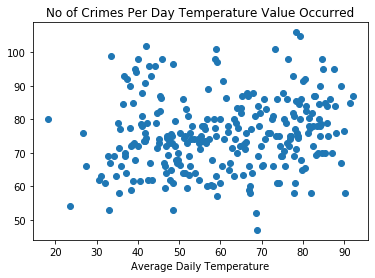

In [11]:
plt.scatter(crime_rate_temp.index,crime_rate_temp.values)
plt.xlabel('Average Daily Temperature')
plt.title('No of Crimes Per Day Temperature Value Occurred')
plt.show()

In [35]:
#Calculate the Pearson correlation coefficient for x and y. Generates correlation coefficient as the first value. 
corr_temp = st.pearsonr(crime_rate_temp.index,crime_rate_temp.values)
print(f"The Pearson correlation coefficient for temperature is {corr_temp[0]}. \
There seems to be a very weak positive relationship. ")

The Pearson correlation coefficient for temperature is 0.15892737734149284. There seems to be a very weak positive relationship. 


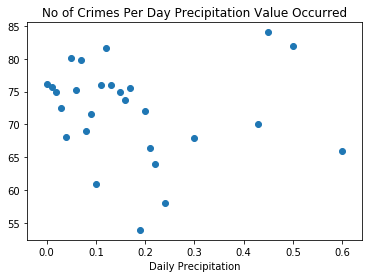

In [13]:
plt.scatter(crime_rate_precip.index,crime_rate_precip.values)
plt.xlabel('Daily Precipitation')
plt.title('No of Crimes Per Day Precipitation Value Occurred')
plt.show()

In [14]:
#Calculate the Pearson correlation coefficient for x and y
corr_precip = st.pearsonr(crime_rate_precip.index,crime_rate_precip.values)
print(f"The Pearson correlation coefficient for precipitation is {corr_precip[0]}. \
There seems to be almost no relationship as it is close to zero. ") 

The Pearson correlation coefficient for precipitation is -0.0738048285976213. There seems to be almost no relationship as it is close to zero. 


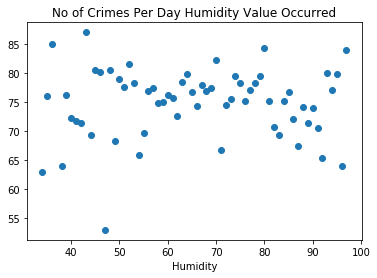

In [15]:
plt.scatter(crime_rate_humid.index,crime_rate_humid.values)
plt.xlabel('Humidity')
plt.title('No of Crimes Per Day Humidity Value Occurred')
plt.show()

In [16]:
#Calculate the Pearson correlation coefficient for x and y
corr_humid = st.pearsonr(crime_rate_humid.index,crime_rate_humid.values)
print(f"The Pearson correlation coefficient for humidity is {corr_humid[0]}. \
There seems to be almost no relationship as it is close to zero. ") 

The Pearson correlation coefficient for humidity is 0.038381213861707925. There seems to be almost no relationship as it is close to zero. 


In [24]:
# Finding average crime per day precipitation vs. no precipitation
precip_col = np.where((data['Total Precipitation (in)']) > 0, 'Precipitation', 'No Precipitation')
data['Precipitation'] = precip_col
data.head()

,ID,Year,Start Date,Start Time,Hour,Offense Group,Offense,Offense Text,Max Temp (f),Min Temp (f),Avg Temp (f),Total Precipitation (in),Avg Humidity (%),Day Condition,Hour Temp (f),Hour Condition,Hour Precipitation (in),Hour Humidity (%),Precipitation
0,0,2022,2022-02-06,00:12:00,12:00AM,violent,robbery,robbery,40.5,24.1,32.8,0.0,52.0,Sunny,26.4,Clear,0.0,52.0,No Precipitation
1,1,2022,2022-02-06,00:19:00,12:00AM,property,theft/other,theft/other,40.5,24.1,32.8,0.0,52.0,Sunny,26.4,Clear,0.0,52.0,No Precipitation
2,2,2022,2022-02-06,01:00:00,1:00AM,property,motor vehicle theft,motor vehicle theft,40.5,24.1,32.8,0.0,52.0,Sunny,26.1,Clear,0.0,52.0,No Precipitation
3,3,2022,2022-02-06,01:30:00,1:00AM,property,theft/other,theft/other,40.5,24.1,32.8,0.0,52.0,Sunny,26.1,Clear,0.0,52.0,No Precipitation
4,4,2022,2022-02-06,02:45:00,2:00AM,violent,robbery,robbery,40.5,24.1,32.8,0.0,52.0,Sunny,25.8,Clear,0.0,53.0,No Precipitation


In [61]:
#Get the number of items in the population of no precipitation
no_precip_crime = crime_by_precip[0.00]
no_precip_days = days_by_precip[0.00]
no_precip_crimerate = no_precip_crime/no_precip_days
no_precip_crimerate

76.1063829787234

In [63]:
#Get the number of items in the population of precipitation
precip_crime = sum(crime_by_precip) - no_precip_crime
precip_days = sum(days_by_precip) - no_precip_days
precip_crimerate = precip_crime/precip_days
precip_crimerate

74.43076923076923

In [66]:
# Chi-Squared Analysis
#χ2 test of Independence - used to decide whether there is a relationship between two variables of a population. 
# H₀: The two categorical variables have no relationship
# H₁: There is a relationship between two categorical variables
# The number of degrees of freedom of the χ2 independence test statistics: d.f. = (# rows -1) *(#columns-1)

#Observed data over the past year
observed_precip = pd.Series([no_precip_crimerate,precip_crimerate], index=["Days with No Precip","Days with Precip"])

#Create dataframe
precip_df = pd.DataFrame([observed_precip]).T
precip_df[1] = (no_precip_crimerate+precip_crimerate)/2
precip_df.columns = ["Observed","Expected"]
precip_df

,Observed,Expected
Days with No Precip,76.106383,75.268576
Days with Precip,74.430769,75.268576


In [67]:
# The degree of freedom is (2-1)*(2-1) = 1
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
precip_crit_value = st.chi2.ppf(q = 0.95, df = 1)
print(f"The Chi-Squared critical value for precipitation is {precip_crit_value}. ") 

The Chi-Squared critical value for precipitation is 3.841458820694124. 


In [68]:
# Run the chi square test with st.chisquare()
st.chisquare(precip_df['Observed'], precip_df['Expected'])

Power_divergenceResult(statistic=0.018651086400424045, pvalue=0.8913714967950712)

CONCLUSION FOR IMPACT OF PRECIPITATION ON CRIME RATE: The chi-squared value of 0.0186 exceeds the critical value of 3.84 and we conclude that the results are NOT statistically significant.

### Testing Correlation Between Precipitation and Crime

In [101]:
#This could maybe be deleted, to be confirmed
data.groupby(['Precipitation', 'Start Date']).count()

no_precip = data.loc[data['Precipitation'] == 'No Precipitation', :]
no_precip_group = pd.DataFrame(no_precip.groupby('Start Date').count())
avg_crime_no_precip = (no_precip_group['ID']).mean()
median_crime_no_precip = (no_precip_group['ID']).median()
mode_crimes_no_precip = (no_precip_group['ID']).mode()
print(f"The average of crimes per day with no precipitation: {avg_crime_no_precip}")
print(f"The median of crimes per day with no precipitation: {median_crime_no_precip}")
print(f"The mode of crimes per day with no precipitation: {mode_crimes_no_precip}")

precip = data.loc[data['Precipitation'] == 'Precipitation', :]
precip_group = pd.DataFrame(precip.groupby('Start Date').count())
avg_crime_precip = (precip_group['ID']).mean()
median_crime_precip = (precip_group['ID']).median()
mode_crimes_precip = (precip_group['ID']).mode()
print(f"The average crimes per day with precipitation: {avg_crime_precip}")
print(f"The median crimes per day with precipitation: {median_crime_precip}")
print(f"The mode of crimes per day with precipitation: {mode_crimes_precip}")

The average of crimes per day with no precipitation: 76.1063829787234
The median of crimes per day with no precipitation: 75.0
The mode of crimes per day with no precipitation: 0    64
1    75
dtype: int64
The average crimes per day with precipitation: 74.43076923076923
The median crimes per day with precipitation: 75.0
The mode of crimes per day with precipitation: 0    75
dtype: int64


In [89]:
# Chi-Squared Analysis
#χ2 test of Independence - used to decide whether there is a relationship between two variables of a population. 
# Useful when analyzing survey results of 2 categorical variables.
# H₀: The two categorical variables have no relationship
# H₁: There is a relationship between two categorical variables
# The number of degrees of freedom of the χ2 independence test statistics: d.f. = (# rows -1) *(#columns-1)

observed = pd.Series([76.1063829787234, 74.43076923076923], index=['No Precipitation', 'Precipitation'])
chi_df = pd.DataFrame([observed]).T

# Expected avg crime per day
grouped = pd.DataFrame(data.groupby('Start Date').count())
avg_crime_total = grouped['ID'].mean()
print(f"Average crime over all 365 days: {avg_crime_total}")

# Column of expected values
chi_df[1] = avg_crime_total
chi_df.columns = ['observed', 'expected']

# Degrees of freedom 2 - 1 = 1
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = st.chi2.ppf(q = 0.95, df = 1)
critical_value

Average crime over all 365 days: 75.5095890410959


3.841458820694124

In [90]:
# Chi Squared
st.chisquare(chi_df['observed'], chi_df['expected'])

Power_divergenceResult(statistic=0.020130094819016196, pvalue=0.8871743456255738)

<BarContainer object of 2 artists>

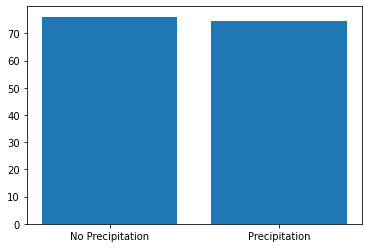

In [91]:
# Visualization
x_axis = ['No Precipitation', "Precipitation"]
y_axis = [avg_crime_no_precip, avg_crime_precip]
plt.bar(x_axis, y_axis)
# plt.title("""Total Number of Crimes Reported
# Precipitation vs. No Precipitation""")
# plt.xticks(tick_locations, precip)
# plt.xlabel('Precipitation')
# plt.ylabel('Crimes Reported')
# plt.ylim(top=30000)
# for index,data in enumerate((crime_weather.groupby(precip_col).count()['ID'])):
#     plt.text(x=index , y=data+250 , s=f"{data}", ha='center')
# plt.show()

### Testing Correlation Between Temperature and Crime

The lower quartile is 46.7
The upper quartile is 76.0


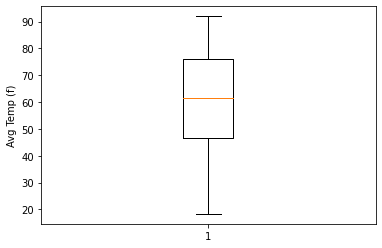

In [92]:
# Identify low, moderate, high temperatures
weather_file = "output_data/dc_weather.csv"
weather_day = pd.read_csv(weather_file)

quartiles = weather_day['avgtemp_f'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
print(f"The lower quartile is {lowerq}")
print(f"The upper quartile is {upperq}")

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Avg Temp (f)')
ax1.boxplot(weather_day['avgtemp_f'])
flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'red'}
plt.show()

In [103]:
bins = [0, 46.6, 76.1, 100]
bin_labels = ['low', 'moderate', 'high']

# organize weather by bins
data['Temperature Level'] = pd.cut(data['Avg Temp (f)'], bins, labels=bin_labels, include_lowest=True)

# Avg crime per day low temperature
low_weather = data.loc[data['Temperature Level'] == 'low', :]
low_group = pd.DataFrame(low_weather.groupby('Start Date').count())
avg_crime_low = (low_group['ID']).mean()
median_crime_low = (low_group['ID']).median()
mode_crime_low = (low_group['ID']).mode()
print(f"The average of crimes per day with low temperature: {avg_crime_low}")
print(f"The median of crimes per day with low temperature: {median_crime_low}")
print(f"The mode of crimes per day with low temperature: {mode_crime_low}")

# Avg crime per day moderate temperature
mod_weather = data.loc[data['Temperature Level'] == 'moderate', :]
mod_group = pd.DataFrame(mod_weather.groupby('Start Date').count())
avg_crime_mod = (mod_group['ID']).mean()
median_crime_mod = (mod_group['ID']).median()
mode_crime_mod = (mod_group['ID']).mode()
print(f"The average of crimes per day with moderate temperature: {avg_crime_mod}")
print(f"The median of crimes per day with moderate temperature: {median_crime_mod}")
print(f"The mode of crimes per day with moderate temperature: {mode_crime_mod}")

# Avg crime per day high temperature
high_weather = data.loc[data['Temperature Level'] == 'high', :]
high_group = pd.DataFrame(high_weather.groupby('Start Date').count())
avg_crime_high = (high_group['ID']).mean()
median_crime_high = (high_group['ID']).median()
mode_crime_high = (high_group['ID']).mode()
print(f"The average of crimes per day with high temperature: {avg_crime_high}")
print(f"The median of crimes per day with high temperature: {median_crime_high}")
print(f"The mode of crimes per day with high temperature: {mode_crime_high}")

The average of crimes per day with low temperature: 75.08791208791209
The median of crimes per day with low temperature: 75.0
The mode of crimes per day with low temperature: 0    75
dtype: int64
The average of crimes per day with moderate temperature: 73.89247311827957
The median of crimes per day with moderate temperature: 74.0
The mode of crimes per day with moderate temperature: 0    75
dtype: int64
The average of crimes per day with high temperature: 79.36363636363636
The median of crimes per day with high temperature: 79.5
The mode of crimes per day with high temperature: 0    78
dtype: int64


In [94]:
# One-way ANOVA Test
# Perform the ANOVA
# Take samples of 50 from each group.
low_sample = random.sample(list(low_group['ID']), k=50)
mod_sample = random.sample(list(mod_group['ID']), k=50)
high_sample = random.sample(list(high_group['ID']), k=50)
st.f_oneway(low_sample, mod_sample, high_sample)


F_onewayResult(statistic=2.392428475274271, pvalue=0.0949583910975129)

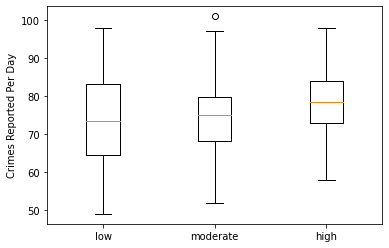

In [95]:
# Box plot
box_plot = []
box_plot.append(low_sample)
box_plot.append(mod_sample)
box_plot.append(high_sample)

temperature_label = ['low', 'moderate', 'high']

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Crimes Reported Per Day')
ax1.boxplot(box_plot, labels=temperature_label)
flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'red'}
plt.show()

### Testing Correlation Between Humidity and Crime

The lower quartile is 55.0
The upper quartile is 76.0


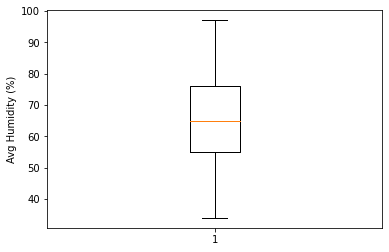

In [96]:
# Identify low, moderate, high humidity levels
weather_file = "output_data/dc_weather.csv"
weather_day = pd.read_csv(weather_file)

quartiles = weather_day['avghumidity'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
print(f"The lower quartile is {lowerq}")
print(f"The upper quartile is {upperq}")

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Avg Humidity (%)')
ax1.boxplot(weather_day['avghumidity'])
flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'red'}
plt.show()

In [105]:
bins = [0, 54.9, 75.9, 100]
bin_labels = ['low humidity', 'moderate humidity', 'high humidity']

# organize weather by bins
data['Humidity Level'] = pd.cut(data['Avg Humidity (%)'], bins, labels=bin_labels, include_lowest=True)

# Avg crime per day low humidity
low_humidity = data.loc[data['Humidity Level'] == 'low humidity', :]
low_humidity_group = pd.DataFrame(low_humidity.groupby('Start Date').count())
avg_crime_low_humidity = (low_humidity_group['ID']).mean()
median_crime_low_humidity = (low_humidity_group['ID']).median()
mode_crime_low_humidity = (low_humidity_group['ID']).mode()
print(f"The average crimes per day with low humidity: {avg_crime_low_humidity}")
print(f"The median of crimes per day with low humidity: {median_crime_low_humidity}")
print(f"The mode of crimes per day with low humidity: {mode_crime_low_humidity}")

# Avg crime per day moderate humidity
mod_humidity = data.loc[data['Humidity Level'] == 'moderate humidity', :]
mod_humidity_group = pd.DataFrame(mod_humidity.groupby('Start Date').count())
avg_crime_mod_humidity = (mod_humidity_group['ID']).mean()
median_crime_mod_humidity = (mod_humidity_group['ID']).median()
mode_crime_mod_humidity = (mod_humidity_group['ID']).mode()
print(f"The average crimes per day with moderate humidity: {avg_crime_mod_humidity}")
print(f"The median of crimes per day with moderate humidity: {median_crime_mod_humidity}")
print(f"The mode of crimes per day with moderate humidity: {mode_crime_mod_humidity}")

# Avg crime per day high humidity
high_humidity = data.loc[data['Humidity Level'] == 'high humidity', :]
high_humidity_group = pd.DataFrame(high_humidity.groupby('Start Date').count())
avg_crime_high_humidity = (high_humidity_group['ID']).mean()
median_crime_high_humidity = (high_humidity_group['ID']).median()
mode_crime_high_humidity = (high_humidity_group['ID']).mode()
print(f"The average crimes per day with high humidity: {avg_crime_high_humidity}")
print(f"The median of crimes per day with high humidity: {median_crime_high_humidity}")
print(f"The mode of crimes per day with high humidity: {mode_crime_high_humidity}")

The average crimes per day with low humidity: 75.04819277108433
The median of crimes per day with low humidity: 75.0
The mode of crimes per day with low humidity: 0    73
dtype: int64
The average crimes per day with moderate humidity: 76.01069518716578
The median of crimes per day with moderate humidity: 76.0
The mode of crimes per day with moderate humidity: 0    75
dtype: int64
The average crimes per day with high humidity: 74.92631578947369
The median of crimes per day with high humidity: 75.0
The mode of crimes per day with high humidity: 0    75
dtype: int64


In [98]:
# One-way ANOVA Test
# Perform the ANOVA
# Take samples of 50 from each group.
low_humidity_sample = random.sample(list(low_humidity_group['ID']), k=50)
mod_humidity_sample = random.sample(list(mod_humidity_group['ID']), k=50)
high_humidity_sample = random.sample(list(high_humidity_group['ID']), k=50)
st.f_oneway(low_humidity_sample, mod_humidity_sample, high_humidity_sample)

F_onewayResult(statistic=1.0009307885695513, pvalue=0.37002798251637)

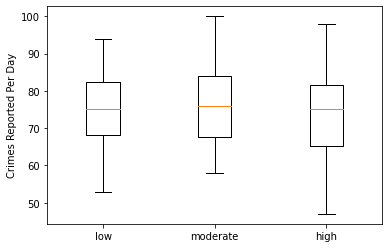

In [99]:
# Box plot
box_plot = []
box_plot.append(low_humidity_sample)
box_plot.append(mod_humidity_sample)
box_plot.append(high_humidity_sample)

humidity_label = ['low humidity', 'moderate humidity', 'high humidity']

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Crimes Reported Per Day')
ax1.boxplot(box_plot, labels=temperature_label)
flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'red'}
plt.show()

### Testing Correlation Between Precipitation and Crime
#### Motor Vehicle Theft and Theft F/Auto Only

In [102]:
# Finding average motor vehicle and theft f/auto crime per day precipitation vs. no precipitation
data_limited = pd.DataFrame(data.loc[(data['Offense Text'] == 'motor vehicle theft') | (data['Offense Text'] == 'theft f/auto'), :])
precip_col = np.where((data_limited['Total Precipitation (in)']) > 0, 'Precipitation', 'No Precipitation')
data_limited['Precipitation'] = precip_col
data_limited.groupby(['Precipitation', 'Start Date']).count()

no_precip = data_limited.loc[data_limited['Precipitation'] == 'No Precipitation', :]
no_precip_group = pd.DataFrame(no_precip.groupby('Start Date').count())
avg_crime_no_precip = (no_precip_group['ID']).mean()
median_crime_no_precip = (no_precip_group['ID']).median()
mode_crimes_no_precip = (no_precip_group['ID']).mode()
print(f"The average of crimes per day with no precipitation: {avg_crime_no_precip}")
print(f"The median of crimes per day with no precipitation: {median_crime_no_precip}")
print(f"The mode of crimes per day with no precipitation: {mode_crimes_no_precip}")

precip = data_limited.loc[data_limited['Precipitation'] == 'Precipitation', :]
precip_group = pd.DataFrame(precip.groupby('Start Date').count())
avg_crime_precip = (precip_group['ID']).mean()
median_crime_precip = (precip_group['ID']).median()
mode_crimes_precip = (precip_group['ID']).mode()
print(f"The average crimes per day with precipitation: {avg_crime_precip}")
print(f"The median crimes per day with precipitation: {median_crime_precip}")
print(f"The mode of crimes per day with precipitation: {mode_crimes_precip}")



The average of crimes per day with no precipitation: 33.11914893617021
The median of crimes per day with no precipitation: 33.0
The mode of crimes per day with no precipitation: 0    27
1    35
dtype: int64
The average crimes per day with precipitation: 31.976923076923075
The median crimes per day with precipitation: 31.0
The mode of crimes per day with precipitation: 0    28
dtype: int64


In [86]:
# Chi-Squared Analysis
observed = pd.Series([33.11914893617021, 31.976923076923075], index=['No Precipitation', 'Precipitation'])
chi_df = pd.DataFrame([observed]).T

# Expected avg crime per day
grouped = pd.DataFrame(data_limited.groupby('Start Date').count())
avg_crime_total = grouped['ID'].mean()
print(f"Average crime over all 365 days: {avg_crime_total}")

# Column of expected values
chi_df[1] = avg_crime_total
chi_df.columns = ['observed', 'expected']

# Degrees of freedom 2 - 1 = 1
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = st.chi2.ppf(q = 0.95, df = 1)
critical_value


Average crime over all 365 days: 32.71232876712329


3.841458820694124

In [87]:
# Chi Squared
st.chisquare(chi_df['observed'], chi_df['expected'])

Power_divergenceResult(statistic=0.021591987050218614, pvalue=0.8831777046620007)

<BarContainer object of 2 artists>

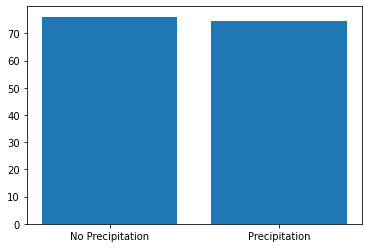

In [88]:
# Visualization
x_axis = ['No Precipitation', "Precipitation"]
y_axis = [avg_crime_no_precip, avg_crime_precip]
plt.bar(x_axis, y_axis)
# plt.title("""Total Number of Crimes Reported
# Precipitation vs. No Precipitation""")
# plt.xticks(tick_locations, precip)
# plt.xlabel('Precipitation')
# plt.ylabel('Crimes Reported')
# plt.ylim(top=30000)
# for index,data in enumerate((crime_weather.groupby(precip_col).count()['ID'])):
#     plt.text(x=index , y=data+250 , s=f"{data}", ha='center')
# plt.show()


### Testing Correlation Between Temperature and Crime
#### Motor Vehicle Theft and Theft F/Auto Only

The lower quartile is 46.7
The upper quartile is 76.0


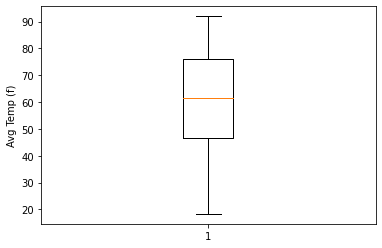

In [43]:
# Identify low, moderate, high temperatures
weather_file = "output_data/dc_weather.csv"
weather_day = pd.read_csv(weather_file)

quartiles = weather_day['avgtemp_f'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
print(f"The lower quartile is {lowerq}")
print(f"The upper quartile is {upperq}")

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Avg Temp (f)')
ax1.boxplot(weather_day['avgtemp_f'])
flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'red'}
plt.show()

In [104]:
bins = [0, 46.6, 76.1, 100]
bin_labels = ['low', 'moderate', 'high']

# organize weather by bins
data_limited['Temperature Level'] = pd.cut(data_limited['Avg Temp (f)'], bins, labels=bin_labels, include_lowest=True)

# Avg crime per day low temperature
low_weather = data_limited.loc[data_limited['Temperature Level'] == 'low', :]
low_group = pd.DataFrame(low_weather.groupby('Start Date').count())
avg_crime_low = (low_group['ID']).mean()
median_crime_low = (low_group['ID']).median()
mode_crime_low = (low_group['ID']).mode()
print(f"The average of crimes per day with low temperature: {avg_crime_low}")
print(f"The median of crimes per day with low temperature: {median_crime_low}")
print(f"The mode of crimes per day with low temperature: {mode_crime_low}")

# Avg crime per day moderate temperature
mod_weather = data_limited.loc[data_limited['Temperature Level'] == 'moderate', :]
mod_group = pd.DataFrame(mod_weather.groupby('Start Date').count())
avg_crime_mod = (mod_group['ID']).mean()
median_crime_mod = (mod_group['ID']).median()
mode_crime_mod = (mod_group['ID']).mode()
print(f"The average of crimes per day with moderate temperature: {avg_crime_mod}")
print(f"The median of crimes per day with moderate temperature: {median_crime_mod}")
print(f"The mode of crimes per day with moderate temperature: {mode_crime_mod}")

# Avg crime per day high temperature
high_weather = data_limited.loc[data_limited['Temperature Level'] == 'high', :]
high_group = pd.DataFrame(high_weather.groupby('Start Date').count())
avg_crime_high = (high_group['ID']).mean()
median_crime_high = (high_group['ID']).median()
mode_crime_high = (high_group['ID']).mode()
print(f"The average of crimes per day with high temperature: {avg_crime_high}")
print(f"The median of crimes per day with high temperature: {median_crime_high}")
print(f"The mode of crimes per day with high temperature: {mode_crime_high}")

The average of crimes per day with low temperature: 34.56043956043956
The median of crimes per day with low temperature: 34.0
The mode of crimes per day with low temperature: 0    28
1    33
2    44
dtype: int64
The average of crimes per day with moderate temperature: 31.817204301075268
The median of crimes per day with moderate temperature: 31.5
The mode of crimes per day with moderate temperature: 0    32
dtype: int64
The average of crimes per day with high temperature: 32.69318181818182
The median of crimes per day with high temperature: 32.0
The mode of crimes per day with high temperature: 0    29
1    31
dtype: int64


In [79]:
# One-way ANOVA Test
# Perform the ANOVA
# Take samples of 50 from each group.
low_sample = random.sample(list(low_group['ID']), k=50)
mod_sample = random.sample(list(mod_group['ID']), k=50)
high_sample = random.sample(list(high_group['ID']), k=50)
st.f_oneway(low_sample, mod_sample, high_sample)




F_onewayResult(statistic=1.1720511587925921, pvalue=0.31260827010033293)

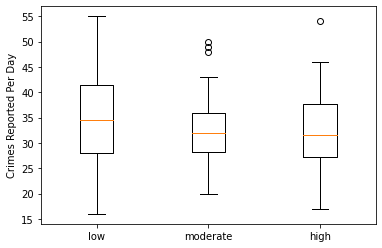

In [80]:
# Box plot
box_plot = []
box_plot.append(low_sample)
box_plot.append(mod_sample)
box_plot.append(high_sample)

temperature_label = ['low', 'moderate', 'high']

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Crimes Reported Per Day')
ax1.boxplot(box_plot, labels=temperature_label)
flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'red'}
plt.show()

### Testing Correlation Between Humidity and Crime
#### Motor Vehicle Theft and Theft F/Auto Only

The lower quartile is 55.0
The upper quartile is 76.0


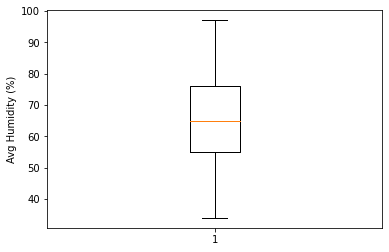

In [68]:
# Identify low, moderate, high humidity levels
weather_file = "output_data/dc_weather.csv"
weather_day = pd.read_csv(weather_file)

quartiles = weather_day['avghumidity'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
print(f"The lower quartile is {lowerq}")
print(f"The upper quartile is {upperq}")

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Avg Humidity (%)')
ax1.boxplot(weather_day['avghumidity'])
flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'red'}
plt.show()

In [106]:
bins = [0, 54.9, 75.9, 100]
bin_labels = ['low humidity', 'moderate humidity', 'high humidity']

# organize weather by bins
data_limited['Humidity Level'] = pd.cut(data_limited['Avg Humidity (%)'], bins, labels=bin_labels, include_lowest=True)

# Avg crime per day low humidity
low_humidity = data_limited.loc[data_limited['Humidity Level'] == 'low humidity', :]
low_humidity_group = pd.DataFrame(low_humidity.groupby('Start Date').count())
avg_crime_low_humidity = (low_humidity_group['ID']).mean()
median_crime_low_humidity = (low_humidity_group['ID']).median()
mode_crime_low_humidity = (low_humidity_group['ID']).mode()
print(f"The average crimes per day with low humidity: {avg_crime_low_humidity}")
print(f"The median of crimes per day with low humidity: {median_crime_low_humidity}")
print(f"The mode of crimes per day with low humidity: {mode_crime_low_humidity}")


# Avg crime per day moderate humidity
mod_humidity = data_limited.loc[data_limited['Humidity Level'] == 'moderate humidity', :]
mod_humidity_group = pd.DataFrame(mod_humidity.groupby('Start Date').count())
avg_crime_mod_humidity = (mod_humidity_group['ID']).mean()
median_crime_mod_humidity = (mod_humidity_group['ID']).median()
mode_crime_mod_humidity = (mod_humidity_group['ID']).mode()
print(f"The average crimes per day with moderate humidity: {avg_crime_mod_humidity}")
print(f"The median of crimes per day with moderate humidity: {median_crime_mod_humidity}")
print(f"The mode of crimes per day with moderate humidity: {mode_crime_mod_humidity}")

# Avg crime per day high humidity
high_humidity = data_limited.loc[data_limited['Humidity Level'] == 'high humidity', :]
high_humidity_group = pd.DataFrame(high_humidity.groupby('Start Date').count())
avg_crime_high_humidity = (high_humidity_group['ID']).mean()
median_crime_high_humidity = (high_humidity_group['ID']).median()
mode_crime_high_humidity = (high_humidity_group['ID']).mode()
print(f"The average crimes per day with high humidity: {avg_crime_high_humidity}")
print(f"The median of crimes per day with high humidity: {median_crime_high_humidity}")
print(f"The mode of crimes per day with high humidity: {mode_crime_high_humidity}")

The average crimes per day with low humidity: 32.9277108433735
The median of crimes per day with low humidity: 32.0
The mode of crimes per day with low humidity: 0    30
dtype: int64
The average crimes per day with moderate humidity: 32.481283422459896
The median of crimes per day with moderate humidity: 32.0
The mode of crimes per day with moderate humidity: 0    25
dtype: int64
The average crimes per day with high humidity: 32.97894736842105
The median of crimes per day with high humidity: 32.0
The mode of crimes per day with high humidity: 0    28
dtype: int64


In [82]:
# One-way ANOVA Test
# Perform the ANOVA
# Take samples of 50 from each group.
low_humidity_sample = random.sample(list(low_humidity_group['ID']), k=50)
mod_humidity_sample = random.sample(list(mod_humidity_group['ID']), k=50)
high_humidity_sample = random.sample(list(high_humidity_group['ID']), k=50)
st.f_oneway(low_humidity_sample, mod_humidity_sample, high_humidity_sample)


F_onewayResult(statistic=0.9082689568857623, pvalue=0.40547224937220094)

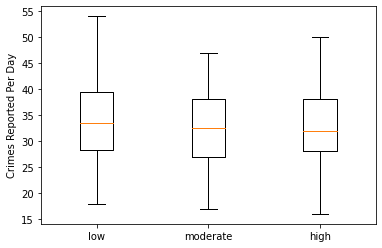

In [84]:
# Box plot
box_plot = []
box_plot.append(low_humidity_sample)
box_plot.append(mod_humidity_sample)
box_plot.append(high_humidity_sample)

humidity_label = ['low humidity', 'moderate humidity', 'high humidity']

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Crimes Reported Per Day')
ax1.boxplot(box_plot, labels=temperature_label)
flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'red'}
plt.show()